In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import linear_model


In [3]:
#Market Mix Modeling
#Revenue and GMV from a Mart

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("final2.csv")
df.head(12)


,Unnamed: 0,month,Revenue_Camera,Revenue_CameraAccessory,Revenue_EntertainmentSmall,Revenue_GameCDDVD,Revenue_GamingHardware,total_gmv,Units_Camera,Units_CameraAccessory,...,Digital,Sponsorship,Content.Marketing,Online.marketing,Affiliates,SEM,Radio,Other,Date,NPS
0,7.0,42186.0,4.614023e+07,17555612.00,8.463275e+07,10756665.00,17851910.86,1.769372e+08,3519.0,12996.0,...,25000000.0,74000000.0,0.0,13000000.0,5000000.0,50000000.0,0.0,0.0,42186.0,54.6
1,8.0,42217.0,6.155000e+04,42278.00,2.586660e+05,18054.00,38648.00,4.191960e+05,4.0,38.0,...,13000000.0,11000000.0,0.0,1000000.0,1000000.0,25000000.0,0.0,0.0,42217.0,60.0
2,9.0,42248.0,1.370821e+08,46205382.00,1.783461e+08,24779734.00,40075197.00,4.264885e+08,9348.0,36051.0,...,14000000.0,628000000.0,6000000.0,164000000.0,50000000.0,62000000.0,0.0,0.0,42248.0,46.9
3,10.0,42278.0,2.427325e+08,32161845.59,1.817664e+08,21095757.87,31775744.15,5.095323e+08,15726.0,27088.0,...,126000000.0,847000000.0,34000000.0,244000000.0,70000000.0,319000000.0,0.0,0.0,42278.0,44.4
4,11.0,42309.0,1.635928e+08,23739626.00,9.420911e+07,19310354.21,33635791.13,3.344877e+08,8972.0,18727.0,...,13000000.0,142000000.0,2000000.0,196000000.0,66000000.0,52000000.0,0.0,0.0,42309.0,47.0
5,12.0,42339.0,2.070381e+08,28616685.00,1.247312e+08,21577796.25,54172892.75,4.361366e+08,11689.0,20372.0,...,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,0.0,0.0,42339.0,45.8
6,1.0,42370.0,1.869358e+08,26387431.00,1.093020e+08,16884873.80,47700159.55,3.872102e+08,10442.0,22525.0,...,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,42370.0,47.1
7,2.0,42401.0,1.549989e+08,25368804.00,1.011725e+08,15100016.49,35614536.62,3.322547e+08,8606.0,25406.0,...,19000000.0,117000000.0,6000000.0,199000000.0,65000000.0,49000000.0,0.0,0.0,42401.0,50.3
8,3.0,42430.0,1.861417e+08,26761949.75,1.202884e+08,22992593.57,48025619.91,4.042102e+08,9969.0,25484.0,...,21000000.0,416000000.0,4000000.0,184000000.0,62000000.0,52000000.0,9000000.0,159000000.0,42430.0,49.0
9,4.0,42461.0,1.470531e+08,25344512.76,9.808951e+07,20810850.22,48481948.15,3.397800e+08,8006.0,25926.0,...,9000000.0,243000000.0,0.0,165000000.0,57000000.0,42000000.0,0.0,0.0,42461.0,51.8


In [4]:
df = df.rename(columns={'Total.Investment': 'total_investment', 'Content.Marketing': 'content_marketing','Online.marketing': 'online_marketing'})
#df_log = df_log.rename(columns={'Total.Investment': 'total_investment', 'Content.Marketing': 'content_marketing','Online.marketing': 'online_marketing'})

<h3>EDA

In [5]:
#Data Description 

df.describe()

,Unnamed: 0,month,Revenue_Camera,Revenue_CameraAccessory,Revenue_EntertainmentSmall,Revenue_GameCDDVD,Revenue_GamingHardware,total_gmv,Units_Camera,Units_CameraAccessory,...,Digital,Sponsorship,content_marketing,online_marketing,Affiliates,SEM,Radio,Other,Date,NPS
count,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000,...,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,6.500000,42354.333333,1.487230e+08,2.542880e+07,1.084462e+08,1.789728e+07,3.807569e+07,3.385709e+08,8528.166667,22103.333333,...,2.483333e+07,3.045000e+08,6.666667e+06,1.614167e+08,5.116667e+07,7.591667e+07,3.916667e+06,4.000000e+07,42354.333333,49.558333
std,3.605551,109.932486,6.728952e+07,1.059202e+07,4.613655e+07,6.936918e+06,1.638798e+07,1.347638e+08,3940.532309,8974.369700,...,3.270205e+07,2.623230e+08,9.442008e+06,8.456892e+07,2.556928e+07,7.953325e+07,8.240238e+06,8.635129e+07,109.932486,4.334944
min,1.000000,42186.000000,6.155000e+04,4.227800e+04,2.586660e+05,1.805400e+04,3.864800e+04,4.191960e+05,4.000000,38.000000,...,5.000000e+06,1.100000e+07,0.000000e+00,1.000000e+06,1.000000e+06,2.500000e+07,0.000000e+00,0.000000e+00,42186.000000,44.400000
25%,3.750000,42270.500000,1.349280e+08,2.341402e+07,9.710295e+07,1.643866e+07,3.317078e+07,3.256713e+08,7664.000000,19960.750000,...,1.200000e+07,1.062500e+08,0.000000e+00,1.430000e+08,4.450000e+07,4.200000e+07,0.000000e+00,0.000000e+00,42270.500000,46.975000
50%,6.500000,42354.500000,1.592958e+08,2.587812e+07,1.052372e+08,2.006060e+07,3.996560e+07,3.634951e+08,9160.000000,23965.500000,...,1.400000e+07,2.465000e+08,5.000000e+06,1.900000e+08,6.350000e+07,5.100000e+07,0.000000e+00,0.000000e+00,42354.500000,48.150000
75%,9.250000,42437.750000,1.863402e+08,2.909359e+07,1.213991e+08,2.193150e+07,4.813970e+07,4.137274e+08,10087.250000,26216.500000,...,2.200000e+07,4.537500e+08,8.250000e+06,2.260000e+08,6.800000e+07,6.375000e+07,2.250000e+06,1.250000e+07,42437.750000,50.825000
max,12.000000,42522.000000,2.427325e+08,4.620538e+07,1.817664e+08,2.477973e+07,5.967982e+07,5.095323e+08,15726.000000,36051.000000,...,1.260000e+08,8.470000e+08,3.400000e+07,2.440000e+08,7.400000e+07,3.190000e+08,2.700000e+07,2.710000e+08,42522.000000,60.000000


In [6]:
df_media = df[['total_gmv','Digital','Sponsorship','online_marketing','Affiliates','content_marketing','TV', 'SEM','Radio', 'Other']]

In [7]:
df_media

,total_gmv,Digital,Sponsorship,online_marketing,Affiliates,content_marketing,TV,SEM,Radio,Other
0,1.769372e+08,25000000.0,74000000.0,13000000.0,5000000.0,0.0,2000000.0,50000000.0,0.0,0.0
1,4.191960e+05,13000000.0,11000000.0,1000000.0,1000000.0,0.0,0.0,25000000.0,0.0,0.0
2,4.264885e+08,14000000.0,628000000.0,164000000.0,50000000.0,6000000.0,39000000.0,62000000.0,0.0,0.0
3,5.095323e+08,126000000.0,847000000.0,244000000.0,70000000.0,34000000.0,61000000.0,319000000.0,0.0,0.0
4,3.344877e+08,13000000.0,142000000.0,196000000.0,66000000.0,2000000.0,42000000.0,52000000.0,0.0,0.0
5,4.361366e+08,31000000.0,567000000.0,225000000.0,68000000.0,11000000.0,54000000.0,112000000.0,0.0,0.0
6,3.872102e+08,5000000.0,42000000.0,229000000.0,74000000.0,9000000.0,44000000.0,42000000.0,27000000.0,271000000.0
7,3.322547e+08,19000000.0,117000000.0,199000000.0,65000000.0,6000000.0,26000000.0,49000000.0,0.0,0.0
8,4.042102e+08,21000000.0,416000000.0,184000000.0,62000000.0,4000000.0,93000000.0,52000000.0,9000000.0,159000000.0
9,3.397800e+08,9000000.0,243000000.0,165000000.0,57000000.0,0.0,52000000.0,42000000.0,0.0,0.0


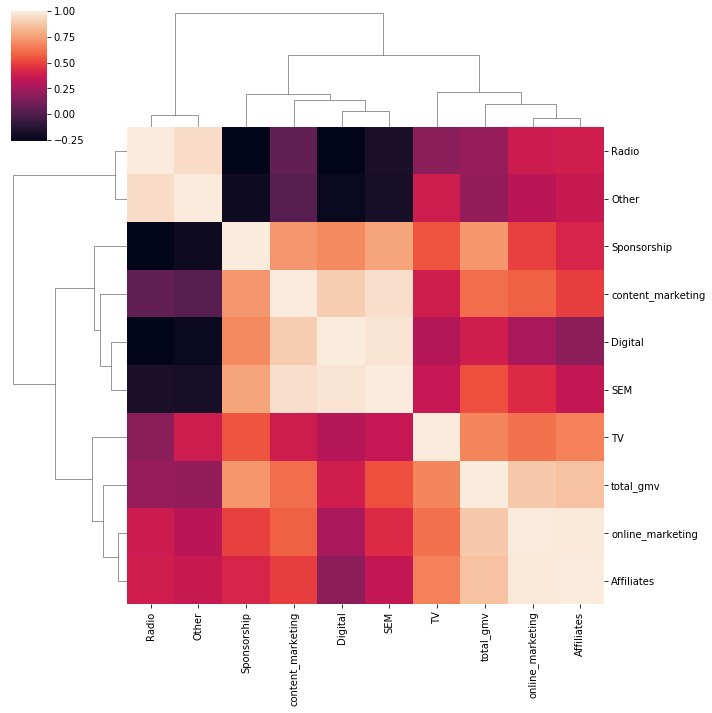

In [8]:
#Correlation for DF
corr = df_media.corr()
sns.clustermap(corr)

In [14]:
df_media.describe()

,total_gmv,Digital,Sponsorship,online_marketing,Affiliates,content_marketing,TV,SEM,Radio,Other
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,3.385709e+08,2.483333e+07,3.045000e+08,1.614167e+08,5.116667e+07,6.666667e+06,3.700000e+07,7.591667e+07,3.916667e+06,4.000000e+07
std,1.347638e+08,3.270205e+07,2.623230e+08,8.456892e+07,2.556928e+07,9.442008e+06,2.688021e+07,7.953325e+07,8.240238e+06,8.635129e+07
min,4.191960e+05,5.000000e+06,1.100000e+07,1.000000e+06,1.000000e+06,0.000000e+00,0.000000e+00,2.500000e+07,0.000000e+00,0.000000e+00
25%,3.256713e+08,1.200000e+07,1.062500e+08,1.430000e+08,4.450000e+07,0.000000e+00,1.625000e+07,4.200000e+07,0.000000e+00,0.000000e+00
50%,3.634951e+08,1.400000e+07,2.465000e+08,1.900000e+08,6.350000e+07,5.000000e+06,4.050000e+07,5.100000e+07,0.000000e+00,0.000000e+00
75%,4.137274e+08,2.200000e+07,4.537500e+08,2.260000e+08,6.800000e+07,8.250000e+06,5.250000e+07,6.375000e+07,2.250000e+06,1.250000e+07
max,5.095323e+08,1.260000e+08,8.470000e+08,2.440000e+08,7.400000e+07,3.400000e+07,9.300000e+07,3.190000e+08,2.700000e+07,2.710000e+08


In [15]:
df

,Unnamed: 0,month,Revenue_Camera,Revenue_CameraAccessory,Revenue_EntertainmentSmall,Revenue_GameCDDVD,Revenue_GamingHardware,total_gmv,Units_Camera,Units_CameraAccessory,...,Digital,Sponsorship,content_marketing,online_marketing,Affiliates,SEM,Radio,Other,Date,NPS
0,7.0,42186.0,4.614023e+07,17555612.00,8.463275e+07,10756665.00,17851910.86,1.769372e+08,3519.0,12996.0,...,25000000.0,74000000.0,0.0,13000000.0,5000000.0,50000000.0,0.0,0.0,42186.0,54.6
1,8.0,42217.0,6.155000e+04,42278.00,2.586660e+05,18054.00,38648.00,4.191960e+05,4.0,38.0,...,13000000.0,11000000.0,0.0,1000000.0,1000000.0,25000000.0,0.0,0.0,42217.0,60.0
2,9.0,42248.0,1.370821e+08,46205382.00,1.783461e+08,24779734.00,40075197.00,4.264885e+08,9348.0,36051.0,...,14000000.0,628000000.0,6000000.0,164000000.0,50000000.0,62000000.0,0.0,0.0,42248.0,46.9
3,10.0,42278.0,2.427325e+08,32161845.59,1.817664e+08,21095757.87,31775744.15,5.095323e+08,15726.0,27088.0,...,126000000.0,847000000.0,34000000.0,244000000.0,70000000.0,319000000.0,0.0,0.0,42278.0,44.4
4,11.0,42309.0,1.635928e+08,23739626.00,9.420911e+07,19310354.21,33635791.13,3.344877e+08,8972.0,18727.0,...,13000000.0,142000000.0,2000000.0,196000000.0,66000000.0,52000000.0,0.0,0.0,42309.0,47.0
5,12.0,42339.0,2.070381e+08,28616685.00,1.247312e+08,21577796.25,54172892.75,4.361366e+08,11689.0,20372.0,...,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,0.0,0.0,42339.0,45.8
6,1.0,42370.0,1.869358e+08,26387431.00,1.093020e+08,16884873.80,47700159.55,3.872102e+08,10442.0,22525.0,...,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,42370.0,47.1
7,2.0,42401.0,1.549989e+08,25368804.00,1.011725e+08,15100016.49,35614536.62,3.322547e+08,8606.0,25406.0,...,19000000.0,117000000.0,6000000.0,199000000.0,65000000.0,49000000.0,0.0,0.0,42401.0,50.3
8,3.0,42430.0,1.861417e+08,26761949.75,1.202884e+08,22992593.57,48025619.91,4.042102e+08,9969.0,25484.0,...,21000000.0,416000000.0,4000000.0,184000000.0,62000000.0,52000000.0,9000000.0,159000000.0,42430.0,49.0
9,4.0,42461.0,1.470531e+08,25344512.76,9.808951e+07,20810850.22,48481948.15,3.397800e+08,8006.0,25926.0,...,9000000.0,243000000.0,0.0,165000000.0,57000000.0,42000000.0,0.0,0.0,42461.0,51.8


<h3>Correlation Matrix for DF_Media

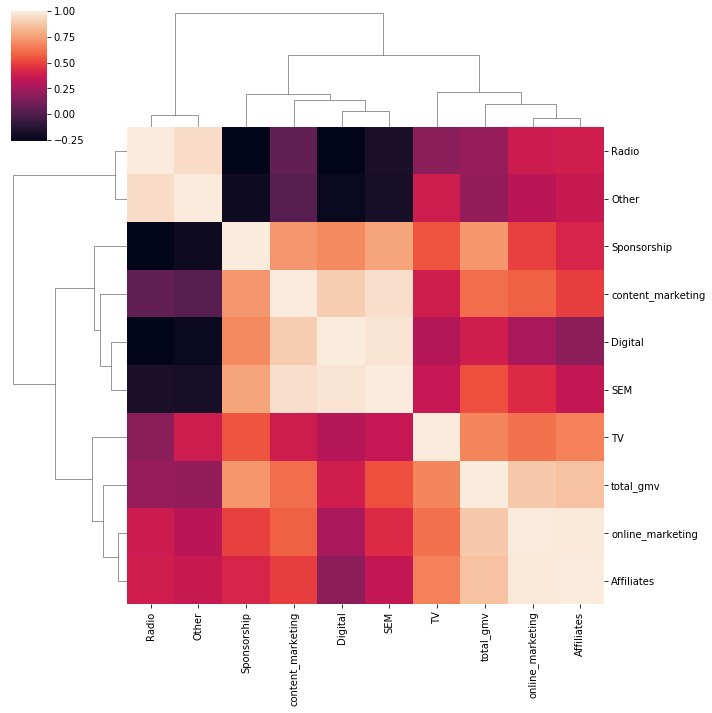

In [16]:
#Correlation b/w variables for DF_Media
corr = df_media.corr()
sns.clustermap(corr)

In [17]:
#sns.pairplot(df_media)

<h3>Feature Selection

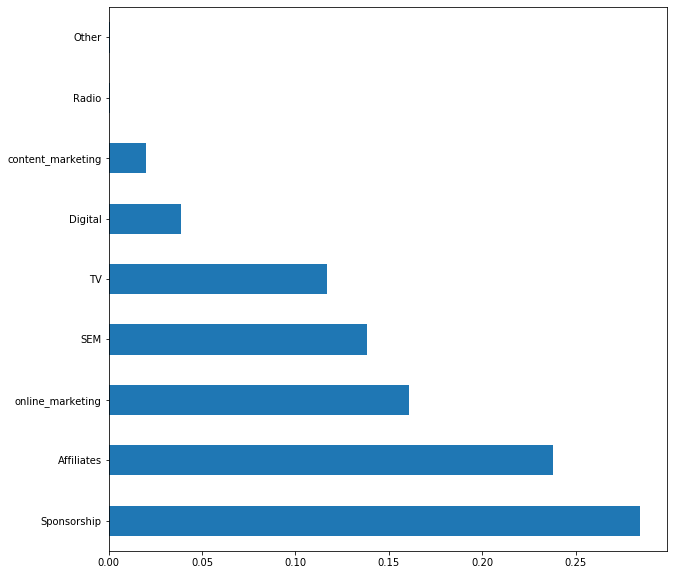

In [18]:
# Setting X and y variables
X = df_media.loc[:, df_media.columns != 'total_gmv']
y = df_media['total_gmv']
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh',figsize=(10,10))

In [19]:
#Table with Corrolations
#a = df.corr(method='pearson')
#df_media = df[['total_gmv','Digital', 'Sponsorship','content_marketing', 'online_marketing','Affiliates', 'SEM','TV']]
a = df_media.corr(method='pearson')

In [20]:
a

,total_gmv,Digital,Sponsorship,online_marketing,Affiliates,content_marketing,TV,SEM,Radio,Other
total_gmv,1.000000,0.390474,0.725936,0.886979,0.865776,0.616916,0.682908,0.534763,0.219719,0.212199
Digital,0.390474,1.000000,0.694983,0.265926,0.188341,0.899553,0.306223,0.973189,-0.254762,-0.219750
Sponsorship,0.725936,0.694983,1.000000,0.495404,0.419455,0.734325,0.549132,0.771471,-0.250088,-0.211838
online_marketing,0.886979,0.265926,0.495404,1.000000,0.988907,0.582987,0.625422,0.435220,0.373022,0.319748
Affiliates,0.865776,0.188341,0.419455,0.988907,1.000000,0.495040,0.669278,0.347755,0.387962,0.360352
content_marketing,0.616916,0.899553,0.734325,0.582987,0.495040,1.000000,0.380395,0.957893,0.062706,0.030662
TV,0.682908,0.306223,0.549132,0.625422,0.669278,0.380395,1.000000,0.350349,0.180587,0.377988
SEM,0.534763,0.973189,0.771471,0.435220,0.347755,0.957893,0.350349,1.000000,-0.167439,-0.176582
Radio,0.219719,-0.254762,-0.250088,0.373022,0.387962,0.062706,0.180587,-0.167439,1.000000,0.947732
Other,0.212199,-0.219750,-0.211838,0.319748,0.360352,0.030662,0.377988,-0.176582,0.947732,1.000000


<h3>Modelling for Total GMV with Adstock 

In [21]:
#Labels and features for Media variables
labels = df['total_gmv']
features = df[['Sponsorship','online_marketing','Affiliates','content_marketing','TV']]

In [335]:
### Linear regression with adstock

import datetime  
import numpy as np  
import pandas as pd
import numpy.random as random
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

np.random.seed(0); np.random.seed(1) # Random seed needs to reset here for reproducibility


ar_coeff = .5 #for this exercise we assume a constant adstock

Online_Marketing_adstock = tsa.filters.filtertools.recursive_filter(df ['online_marketing'], ar_coeff)

Affiliates_adstock = tsa.filters.filtertools.recursive_filter(df ['Affiliates'], ar_coeff)

Sponsorship_adstock = tsa.filters.filtertools.recursive_filter(df['Sponsorship'], ar_coeff)

SEM_adstock = tsa.filters.filtertools.recursive_filter(df ['SEM'], ar_coeff)

TV_adstock = tsa.filters.filtertools.recursive_filter(df ['TV'], ar_coeff)

Radio_adstock = tsa.filters.filtertools.recursive_filter(df ['Radio'], ar_coeff)

Content_adstock = tsa.filters.filtertools.recursive_filter(df ['content_marketing'], ar_coeff)

digital_adstock = tsa.filters.filtertools.recursive_filter(df ['Digital'], ar_coeff)

other_adstock = tsa.filters.filtertools.recursive_filter(df ['Other'], ar_coeff)

# Combine all the pandas series together

df_ad= pd.concat([df['Other'],other_adstock,df['Radio'],Radio_adstock,df['content_marketing'],Content_adstock,df['Digital'],df['online_marketing'],df ['Affiliates'],Affiliates_adstock,df['Sponsorship'],Sponsorship_adstock, df ['SEM'],df ['TV'],TV_adstock],axis=1)

revenue=df ['total_gmv'] 

In [337]:
#Model with Adstock

np.random.seed(0); np.random.seed(1) # Random seed needs to reset here for reproducibility

import statsmodels.formula.api as sm
modelfit1 = sm.ols(formula="revenue~online_marketing+Affiliates_adstock+Sponsorship_adstock+SEM_adstock+Radio_adstock+TV_adstock+Content_adstock+other_adstock", data=df).fit()
#modelfit2 = sm.ols(formula="revenue~Online_Marketing_adstock+Affiliates_adstock+TV_adstock", data=df_ad).fit()
#modelfit3 = sm.ols(formula="revenue~Online_Marketing_adstock+Affiliates_adstock+Sponsorship_adstock", data=df_ad).fit()
modelfit4 = sm.ols(formula="revenue~online_marketing+Affiliates_adstock+Sponsorship_adstock+SEM_adstock", data=df_ad).fit()

print(model1.summary())
#print(modelfit2.summary())
#print(modelfit3.summary())
print(modelfit4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     9.479
Date:                Sat, 02 Jan 2021   Prob (F-statistic):             0.0130
Time:                        14:04:15   Log-Likelihood:                -226.04
No. Observations:                  12   AIC:                             466.1
Df Residuals:                       5   BIC:                             469.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.411e+07   5.63e+0

In [338]:
#Model 2 Parameters, error, and r square
print('Parameters: ', modelfit1.params)
print('R2: ', modelfit1.rsquared)
print('Standard errors: ', modelfit1.bse)

Parameters:  Intercept              5.330473e+07
online_marketing       9.219622e-01
Affiliates_adstock     1.223286e+00
Sponsorship_adstock    5.090687e-01
SEM_adstock           -6.843018e-02
Radio_adstock         -1.557768e+01
TV_adstock            -3.153051e+00
Content_adstock       -5.867336e+00
other_adstock          1.996379e+00
dtype: float64
R2:  0.9359430276704038
Standard errors:  Intercept              3.158807e+08
online_marketing       1.367587e+00
Affiliates_adstock     4.791252e+00
Sponsorship_adstock    2.352822e-01
SEM_adstock            5.788234e+00
Radio_adstock          4.814749e+01
TV_adstock             9.287289e+00
Content_adstock        5.106554e+01
other_adstock          5.890440e+00
dtype: float64


In [325]:
#Actual and predicted values
y_pred = model4.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(12)

,Actual,Predicted
0,1.769372e+08,1.149937e+08
1,4.191960e+05,8.746261e+07
2,4.264885e+08,4.223557e+08
3,5.095323e+08,5.090775e+08
4,3.344877e+08,3.545682e+08
5,4.361366e+08,4.619362e+08
6,3.872102e+08,3.564085e+08
7,3.322547e+08,3.434255e+08
8,4.042102e+08,4.138028e+08
9,3.397800e+08,3.514864e+08


<h3>Modelling for Total GMV without Adstock

In [169]:
#Linear regression without taking in account Adstock

import statsmodels.formula.api as sm
model1 = sm.ols(formula="total_gmv~SEM+online_marketing+Affiliates+TV+Sponsorship+content_marketing", data=df).fit()
model2 = sm.ols(formula="total_gmv~online_marketing+Affiliates+TV+Sponsorship", data=df).fit()
model3 = sm.ols(formula="total_gmv~online_marketing+Affiliates+Sponsorship", data=df).fit()
model4 = sm.ols(formula="total_gmv~online_marketing+SEM+Sponsorship+Affiliates", data=df).fit()

print(model1.summary())
print(model2.summary())
#print(model3.summary())
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              total_gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     18.55
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           0.000790
Time:                        18:00:05   Log-Likelihood:                -226.43
No. Observations:                  12   AIC:                             462.9
Df Residuals:                       7   BIC:                             465.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.441e+07   3.64e+07  

In [168]:
#Model 2 Parameters, error, and r square
print('Parameters: ', model4.params)
print('R2: ', model4.rsquared)
print('Standard errors: ', model4.bse)

Parameters:  Intercept           8.440995e+07
online_marketing   -2.091438e-01
SEM                -1.583811e-01
Sponsorship         2.692144e-01
Affiliates          4.259966e+00
dtype: float64
R2:  0.9137929710610798
Standard errors:  Intercept           3.642283e+07
online_marketing    1.618898e+00
SEM                 3.224400e-01
Sponsorship         9.508994e-02
Affiliates          5.104534e+00
dtype: float64


In [170]:
#Actual and predicted values
y_pred = model4.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(12)

,Actual,Predicted
0,1.769372e+08,1.149937e+08
1,4.191960e+05,8.746261e+07
2,4.264885e+08,4.223557e+08
3,5.095323e+08,5.090775e+08
4,3.344877e+08,3.545682e+08
5,4.361366e+08,4.619362e+08
6,3.872102e+08,3.564085e+08
7,3.322547e+08,3.434255e+08
8,4.042102e+08,4.138028e+08
9,3.397800e+08,3.514864e+08


<h3>Correlation for Revenue Entertainment Small

In [171]:
#corr for Revenue Entertainment Small

df_media = df[['Revenue_EntertainmentSmall','Digital', 'Sponsorship','content_marketing', 'online_marketing','Affiliates', 'SEM','TV']]
e = df_media.corr(method='pearson')

In [172]:
e

,Revenue_EntertainmentSmall,Digital,Sponsorship,content_marketing,online_marketing,Affiliates,SEM,TV
Revenue_EntertainmentSmall,1.000000,0.507794,0.825564,0.644998,0.668291,0.628114,0.607694,0.564145
Digital,0.507794,1.000000,0.694983,0.899553,0.265926,0.188341,0.973189,0.306223
Sponsorship,0.825564,0.694983,1.000000,0.734325,0.495404,0.419455,0.771471,0.549132
content_marketing,0.644998,0.899553,0.734325,1.000000,0.582987,0.495040,0.957893,0.380395
online_marketing,0.668291,0.265926,0.495404,0.582987,1.000000,0.988907,0.435220,0.625422
Affiliates,0.628114,0.188341,0.419455,0.495040,0.988907,1.000000,0.347755,0.669278
SEM,0.607694,0.973189,0.771471,0.957893,0.435220,0.347755,1.000000,0.350349
TV,0.564145,0.306223,0.549132,0.380395,0.625422,0.669278,0.350349,1.000000


<h3>Modelling for Revenue Entertainment Small Category

In [173]:
#Lets try with a different product
#Labels and features for Media variables
labels_e = df['Revenue_EntertainmentSmall']
features_e = df[['Sponsorship','online_marketing','Affiliates','content_marketing']]

In [174]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="Revenue_EntertainmentSmall~Sponsorship+Affiliates+content_marketing+online_marketing+SEM", data=df).fit()
model2 = sm.ols(formula="Revenue_EntertainmentSmall~Sponsorship+content_marketing+online_marketing", data=df).fit()
#model3 = sm.ols(formula="Revenue_Camera~Affiliates", data=df_media).fit()

print(model1.summary())
print(model2.summary())
#print(model3.summary())

                                OLS Regression Results                                
Dep. Variable:     Revenue_EntertainmentSmall   R-squared:                       0.791
Model:                                    OLS   Adj. R-squared:                  0.617
Method:                         Least Squares   F-statistic:                     4.539
Date:                        Sat, 02 Jan 2021   Prob (F-statistic):             0.0465
Time:                                11:58:32   Log-Likelihood:                -218.88
No. Observations:                          12   AIC:                             449.8
Df Residuals:                               6   BIC:                             452.7
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

C:\Users\Ricardo\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [175]:
#Model 2 Parameters, error, and r square
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)

Parameters:  Intercept            4.082203e+07
Sponsorship          1.248167e-01
content_marketing   -4.498873e-01
online_marketing     2.020652e-01
dtype: float64
R2:  0.7740297698794334
Standard errors:  Intercept            1.791593e+07
Sponsorship          4.387399e-02
content_marketing    1.303217e+00
online_marketing     1.136997e-01
dtype: float64
